### Libraries and data import

Let us get our hands dirty right away and start by importing one audio file. In our analysis we will mostly use [**librosa**](https://librosa.org/doc/main/index.html) Python package for audio analysis but other Python packages are available and can  be used when working with sound. To install librosa package use command `conda install -c conda-forge librosa` if you are using Anaconda Python distribution or `pip install librosa`. Also, install any other packages from below if they are not installed already (complete instructions are located in `readme.txt` file).

*Note*: Librosa submodules that are most useful are [**librosa.core**](https://librosa.org/doc/main/core.html#core) and [**librosa.feature**](https://librosa.org/doc/main/feature.html#feature). 

In [1]:
%matplotlib inline

from IPython.display import Audio
from IPython.display import Image

import numpy as np 
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt

In [2]:
Audio('./input/cat.wav')

In [3]:
y, sr = lr.load('./input/cat.wav')

In [4]:
y,sr

(array([ 0.06846419,  0.06607523, -0.02877459, ...,  0.00496304,
         0.00740266,  0.0070764 ], dtype=float32),
 22050)

We can see that the output od `lr.load` function is one array or time series (`y`) and one integer(`sr`).

Integer `sr` is called the **sampling rate** and it is the number of observations per second. First `sr` elements from the array `y` define sampled sound in the first second, next `sr` elements define sampled sound in the second second and so on. Altogether, as librosa by default sets the sampling rate to 22,050 and the length of our audio is 5 seconds, this means that we have in total sr * 5 = 110,250 observations.

*Question*: What is the native sampling rate for our wav file and how to ingest data using native sampling rate?

Sample rate is also important when creating a discrete digital signal from analog signal - we would like to have as clear sound as possible but not to be too big to handle. CDs are usually recorded at 44.1kHz - which means that every second, 44,100 samples were taken. 

In [5]:
print(len(y))
print(sr)

110250
22050


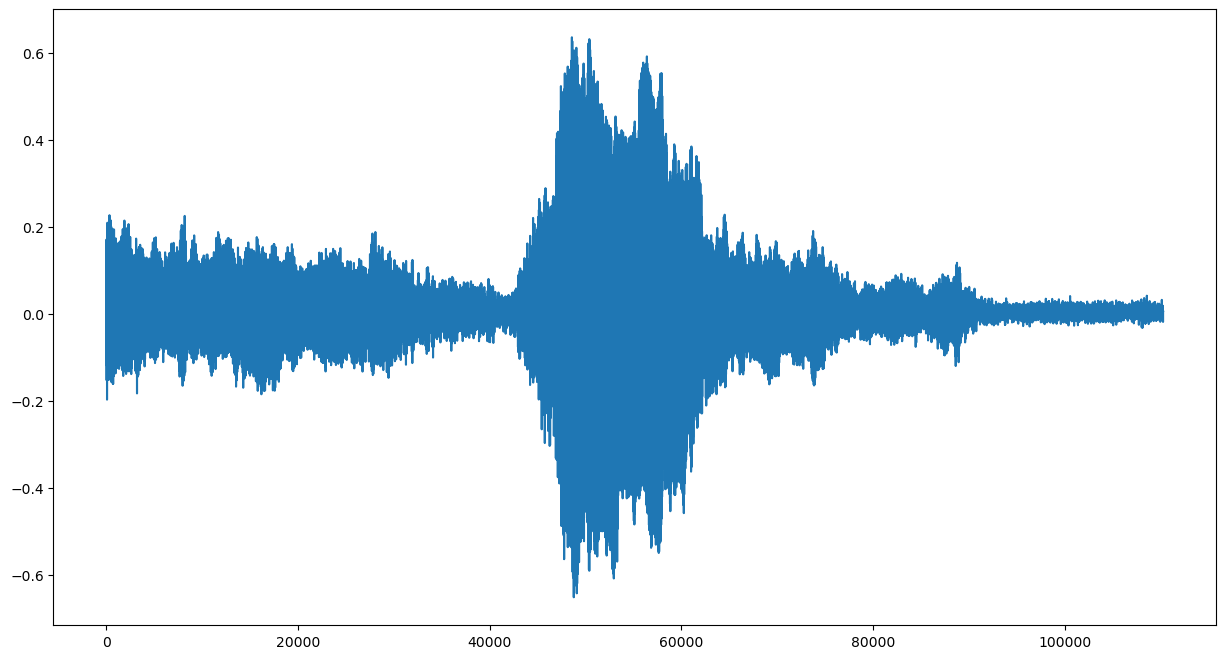

In [6]:
plt.figure(figsize = (15, 8))
plt.plot(y)
plt.show()

The x-axis on this figure represents the time index (sample number) while y-axis represents the intensity of the audio signal. This is why we say that this is the **time domain representation** of the sound. The intensity of the signal or amplitude is usually represented in a relative scale that ranges from -1 to 1. The values of the `y` array represent the displacement of the sound wave from its resting position.

Let us now experiment with sample rates a little bit. We will have `y` fixed and change sample rate `sr`.

*Question*: What do you think having smaller/bigger `sr` will result in?

In [7]:
sample_rates = [60000, 22050, 16000, 10000]

for sr in sample_rates:
    display(Audio(data = y, rate = sr)) 

As we can see our sample file playing speed and time length changed but we also hear sound differently (pitch of sound is changed). Later we will see how we change length of audio without this distortion.

*Question*: Why do we hear squeaky noise when the audio is the shortest?

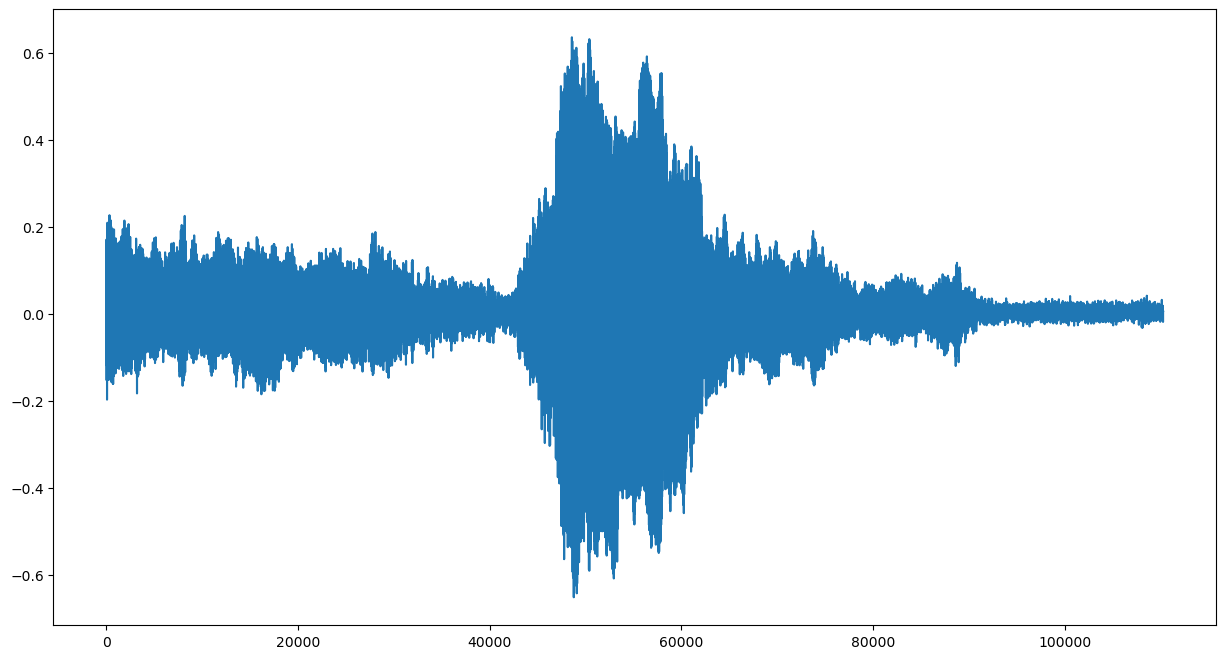

In [8]:
plt.figure(figsize = (15, 8))
plt.plot(y)
plt.show()

Also, we can use lower sample rate (e.g. `sr=5000 Hz`) when ingesting wav file than the default one (`sr=22050 Hz`). As a result we will get a smaller array `y` and lower sound quality.

*Question*: What is the best sound quality that we can get from our wav file? 

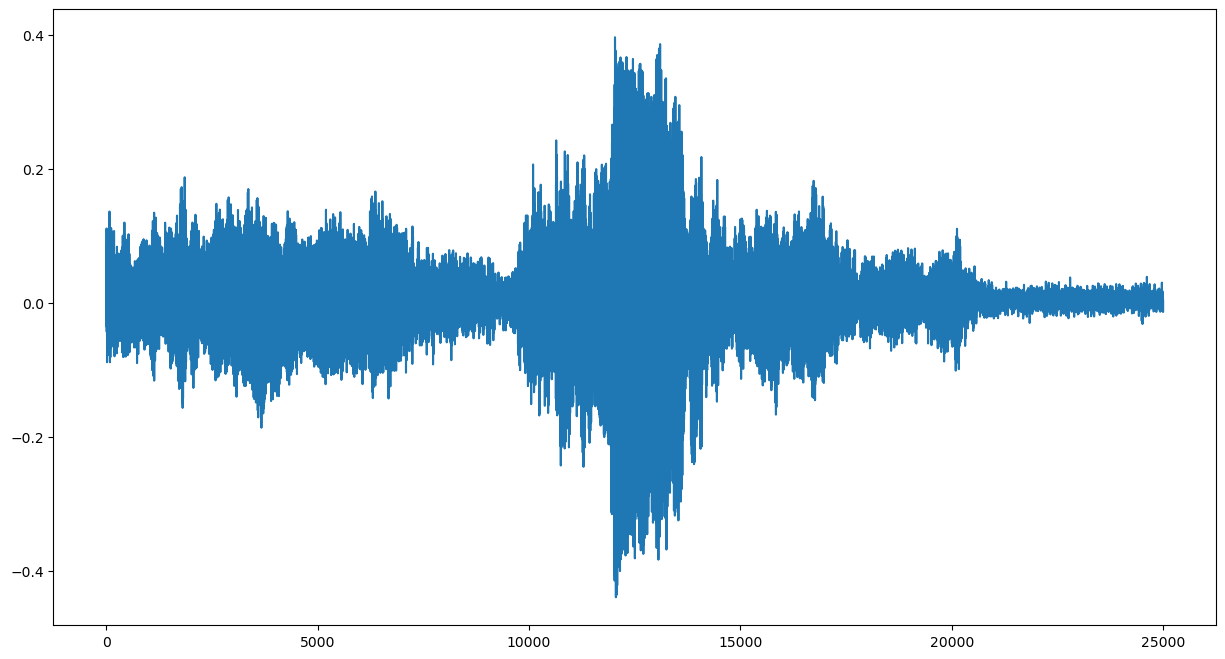

In [9]:
#smaller sample rate
y,sr=librosa.load('./input/cat.wav', sr=5000)
plt.figure(figsize = (15, 8))
plt.plot(y)
plt.show()

In [10]:
Audio(data = y, rate = sr)

In [11]:
len(y)

25000

Let us zoom in our time series a little.

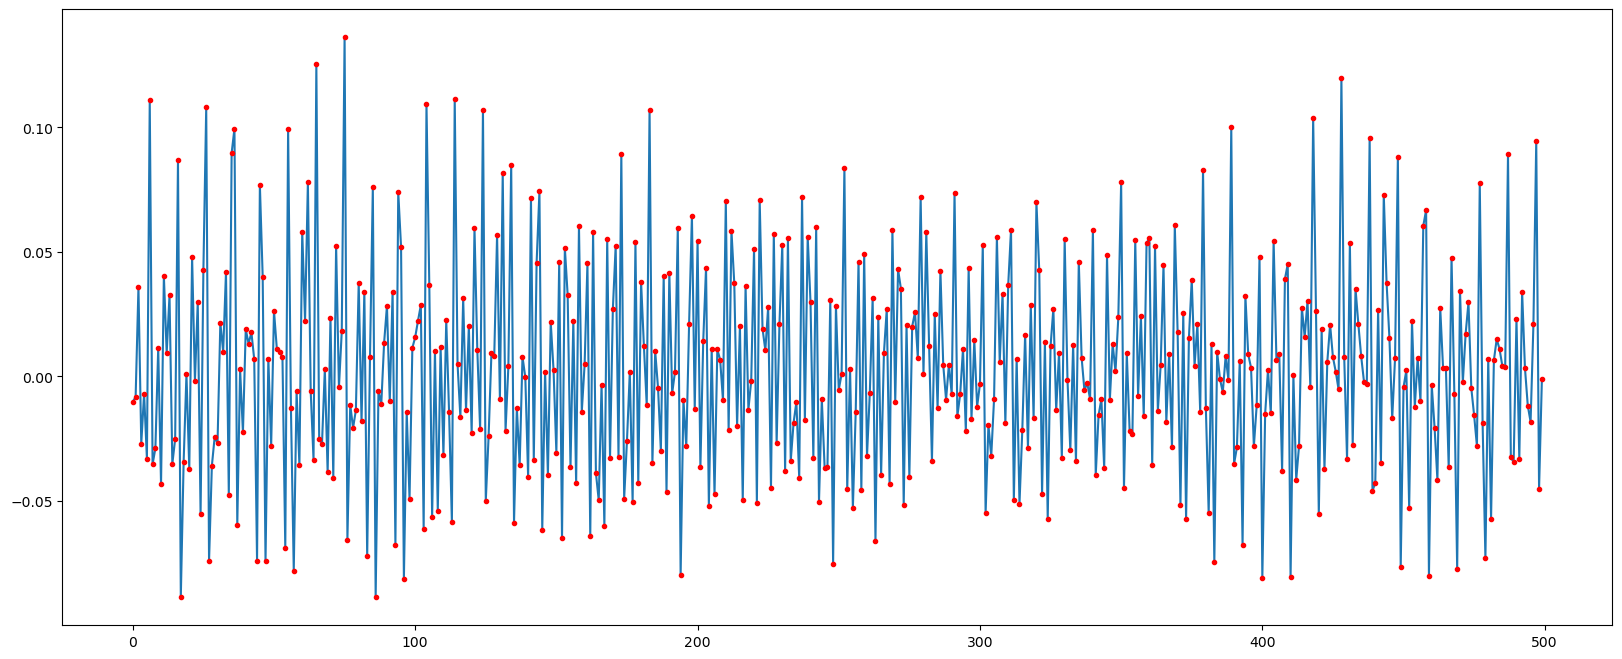

In [12]:
plt.figure(figsize = (20, 8))
plt.plot(y[:500])
plt.plot(y[:500], ".", color = "red")
plt.show()

*Question*: What can we conclude from this graph?

### (Sound) waves

In [13]:
Image(url="./input/soud_wave.png", width=600)

**Sound** is a type of mechanical wave that travels through a medium such as air, water, or solids. It consists of a series of compressions and rarefactions in the medium, which propagate in a wave-like manner.

In terms of particles, sound waves are created by the vibration of particles in the medium. As the sound source vibrates, it creates a disturbance in the medium, causing the particles to oscillate back and forth around their equilibrium positions. This oscillation of particles creates areas of high pressure, called *compressions*, and areas of low pressure, called *rarefactions*, which propagate through the medium as a wave.

*Question*: Can a sound propagate in vacuum?

**Important definitions**

**PERIOD (T)** - distance between two adjacent ups or downs. In an audio wave, period refers to the time it takes for one complete cycle of the wave to occur, and it is measured in seconds

**AMPLITUDE (A)** - the strength or intensity of the wave, measured in decibels (dB). Amplitude represents the maximum displacement of the wave from its resting position (i.e., the maximum height of the wave). In practical terms, amplitude corresponds to the perceived loudness of the sound. Higher amplitudes correspond to louder sounds, while lower amplitudes correspond to quieter sounds.

**FREQUENCY (f)** - frequency refers to the number of complete cycles of the wave that occur in one second, and it is measured in Hertz (Hz). The frequency of a sound wave corresponds to the pitch of the sound we hear. 

$$f = \frac{1}{T}$$

$$y(t)=A\cdot \sin (2\pi f t+\varphi)$$

**Higher frequency -> Higher sound**

**Larger amplitude -> Louder sound**

Humans can detect sounds in a frequency range from about 20 Hz to 20 kHz. Sound waves above 20 kHz are known as *ultrasound* while sound waves below 20 Hz are known as *infrasound*. Cats detect sounds in a frequency range from about 48 Hz to 85 kHz.

*Note*: $\omega = 2\pi f$ is called the *angular frequency* and it is the rate of change of the function argument in units of radians per second.

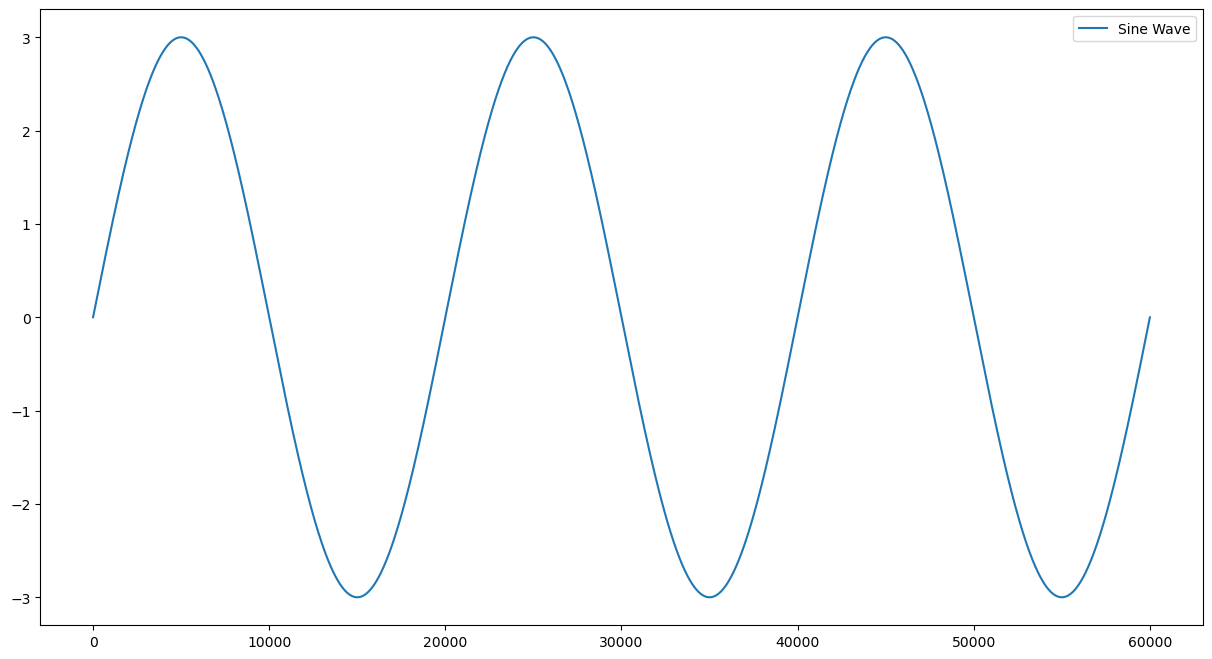

In [14]:
def sine_wave(amp, freq, time, phase):
    
    y_list = []
    for t in (time):
        y = amp * np.sin(2 * np.pi * freq * t + phase)
        y_list.append(y)
        
    return np.array(y_list)

wave = sine_wave(3, .5, np.arange(0,6, 0.0001), 0)

plt.figure(figsize = (15,8))
plt.plot(wave, label = "Sine Wave")
plt.legend()
plt.show()

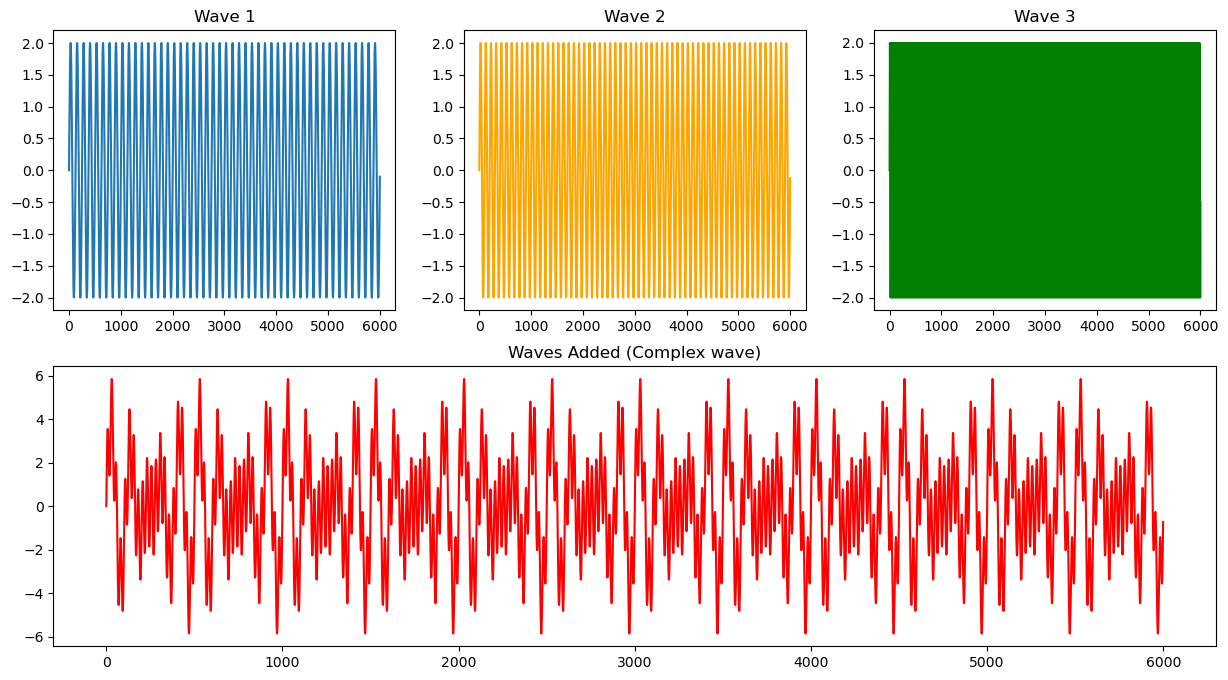

In [35]:
s1 = sine_wave(2,0.8, np.arange(0,60,0.01), 0)
s2 = sine_wave(2,1, np.arange(0,60,0.01), 0)
s3 = sine_wave(2,4, np.arange(0,60,0.01), 0)

s1, s2, s3 = np.array(s1), np.array(s2), np.array(s3) 

plt.figure(figsize = (15,8))

ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 3), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 3), (0, 2), colspan=1)
ax4 = plt.subplot2grid((2, 3), (1, 0), colspan=3)

ax4.plot(s1 + s2 + s3, color = "red")
ax4.set_title("Waves Added (Complex wave)")

ax1.plot(s1)
ax1.set_title("Wave 1")

ax2.plot(s2, color = "orange")
ax2.set_title("Wave 2")

ax3.plot(s3, color = "green")
ax3.set_title("Wave 3")

plt.show()

In [44]:
display(Audio(data = s1, rate = 10000)) 

In [45]:
display(Audio(data = s1+s2+s3, rate = 10000))

In [38]:
len(s1)

6000

WOW - we created a sound :)

*Question*: Would larger amplitude result in louder sound?

A decibel (dB) is a unit of measurement that measures sound intensity. On the decibel scale, the quietest audible sound (perceived near total silence) is 0 dB. A sound 10 times more powerful is 10 dB. A sound 100 times more powerful than near total silence is 20 dB. A sound 1,000 times more powerful than near total silence is 30 dB and so on.

In [18]:
Image(url="./input/decibel-hearing-range.png", width=600)

### Signal domains

In [19]:
Image(url="./input/signal_domains.png", width=600)

#### Time Domain
So far we have visualized sound only in the time domain - time was on the x-axis and amplitude (intensity) on the y-axis.

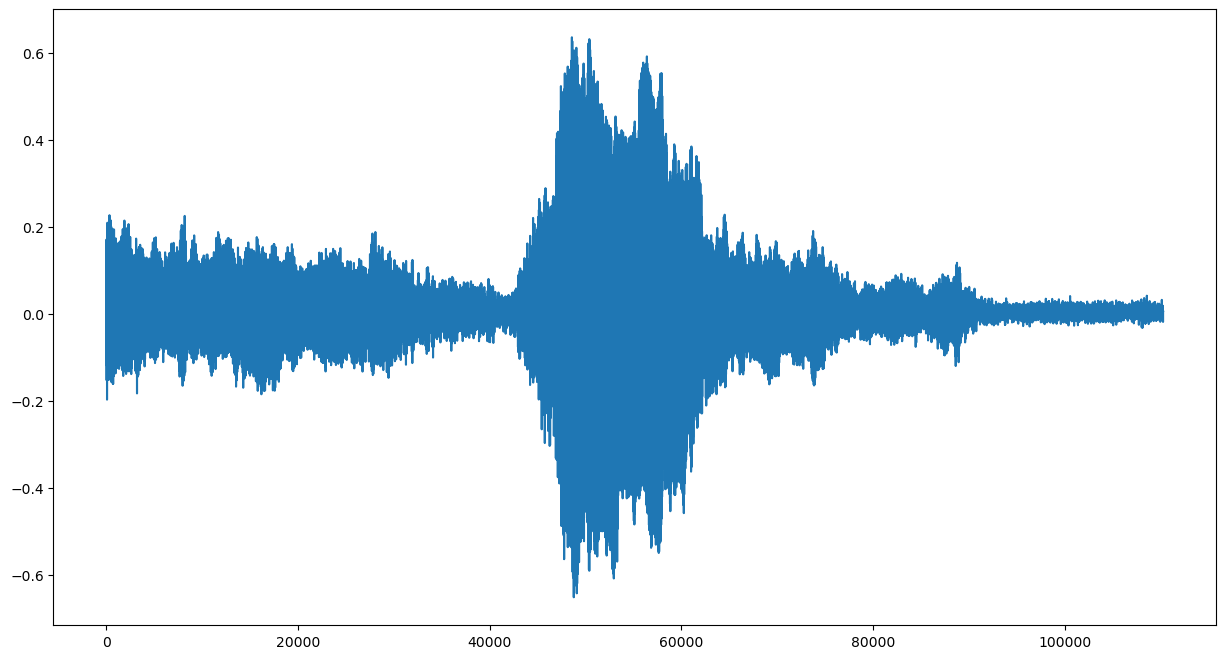

In [24]:
y,sr=librosa.load('./input/cat.wav')
plt.figure(figsize = (15, 8))
plt.plot(y)
plt.show()

#### Frequency Domain

In the frequency domain we have frequency on the x-axis and magnitude on the y-axis - this representation gives us complementary view of our time series. Frequency domain representation shows relevance of each frequency. To calculate this we are using a technique called **Fast Fourier Transform (FFT)**. Take a look at: https://www.youtube.com/watch?v=-GYB7khbIA0 (30.s-)

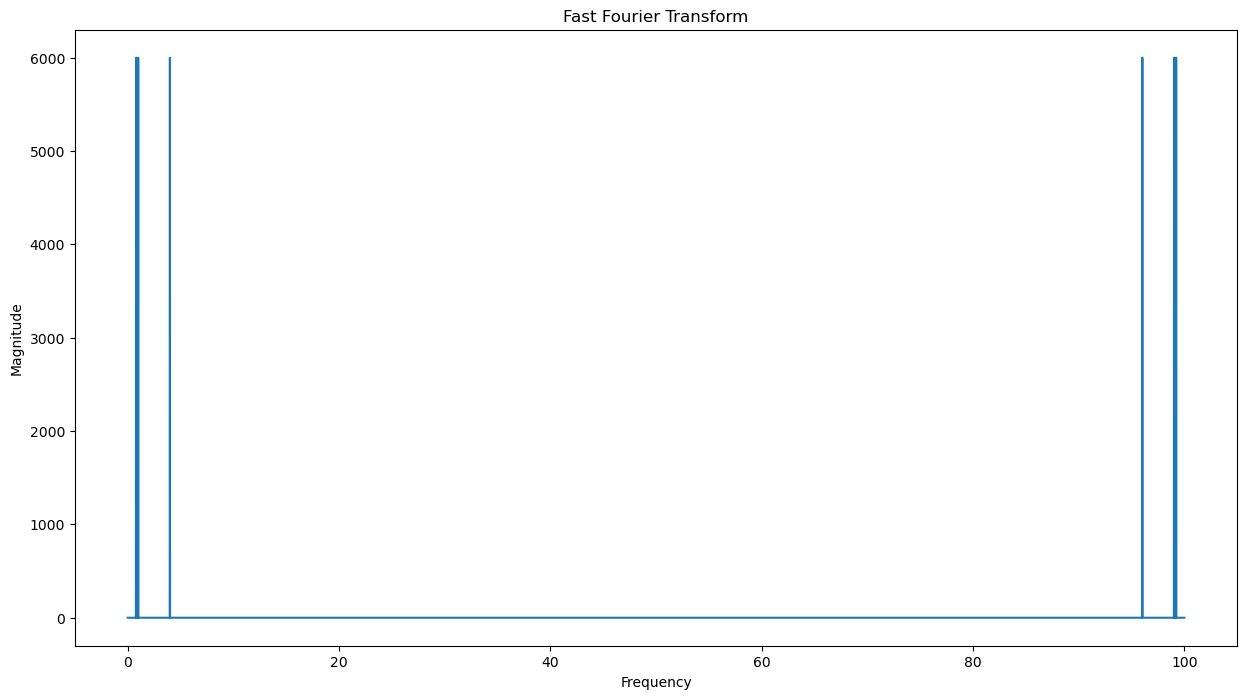

In [48]:
fft = np.fft.fft(s1+s2+s3)

magnitude = np.abs(fft)
freq = np.linspace(0, 100, len(magnitude))

plt.figure(figsize = (15, 8))
plt.plot(freq, magnitude)
plt.title("Fast Fourier Transform")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

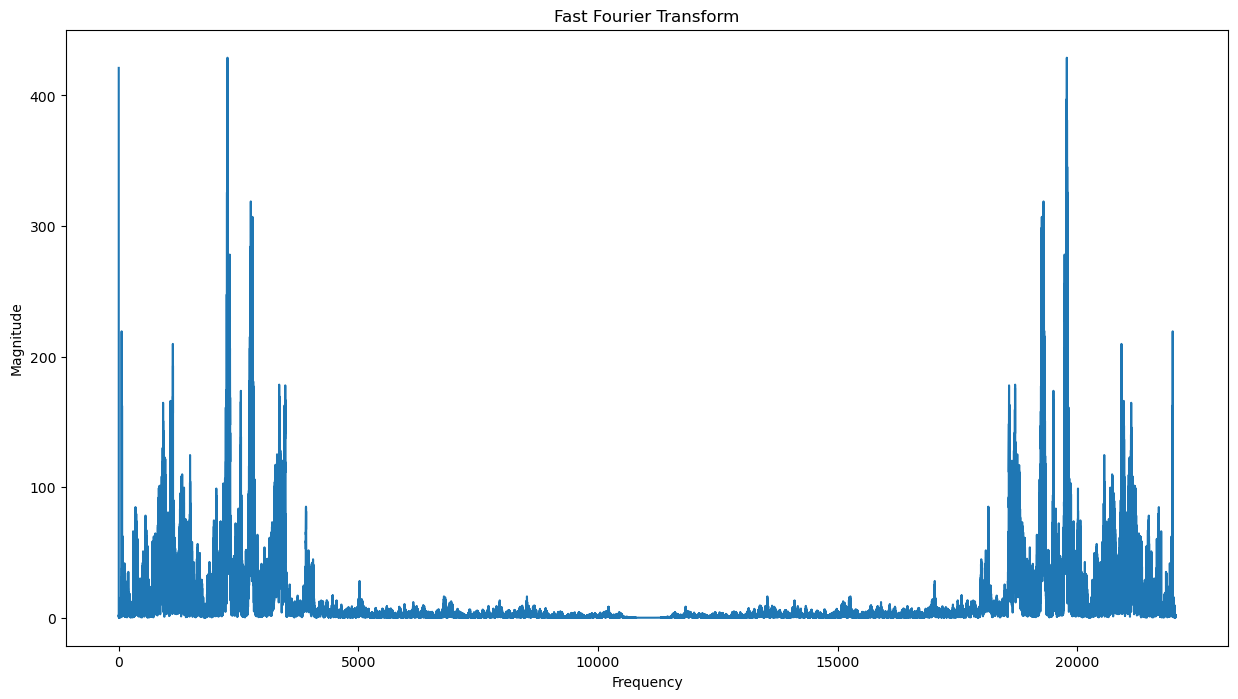

In [51]:
y,sr=librosa.load('./input/cat.wav')
fft = np.fft.fft(y)

magnitude = np.abs(fft)
freq = np.linspace(0, sr, len(magnitude))

plt.figure(figsize = (15, 8))
plt.plot(freq, magnitude)
plt.title("Fast Fourier Transform")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

The FFT is a fast algorithm for computing the **Discrete Fourier Transform (DFT)**, which is a mathematical operation that transforms a time-domain signal into its frequency-domain representation. The DFT assumes that the signal is stationary, meaning that its frequency content does not change over time.

In [52]:
Image(url="./input/dff_idff.png", width=300)

Inverse DFT shows decomposition of our wave to linear combination of sinusoidal function ($e^{2\pi kn/N}=\cos(2\pi kn/N)+i \sin(2\pi kn/N)$) where $X_k$ are the coefficients in this linear combination (they correspond to frequency $k/N$ cycles per time unit). This means that we can look at the Fourier transformation as a change of basis for the vector space. 

As we can see FFT is symetrical so we can just use the first half.

In [53]:
len(freq)

110250

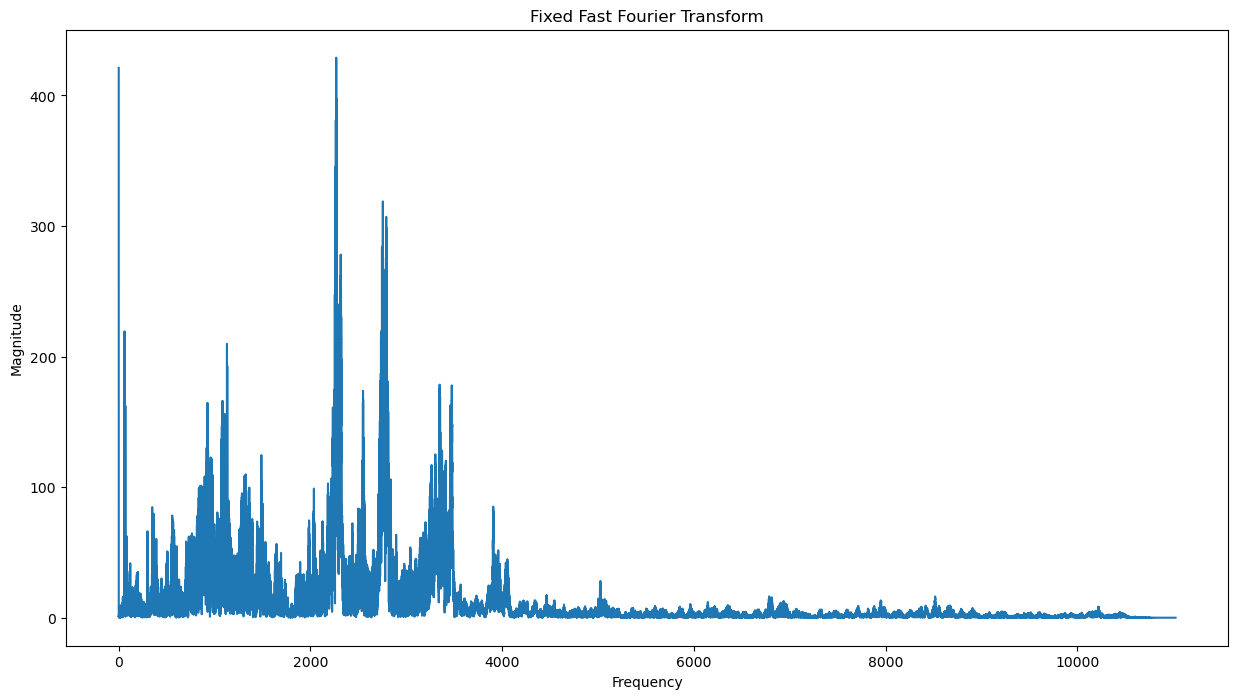

In [54]:
left_freq = freq[:int(len(freq)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.figure(figsize = (15, 8))
plt.plot(left_freq, left_magnitude)
plt.title("Fixed Fast Fourier Transform")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

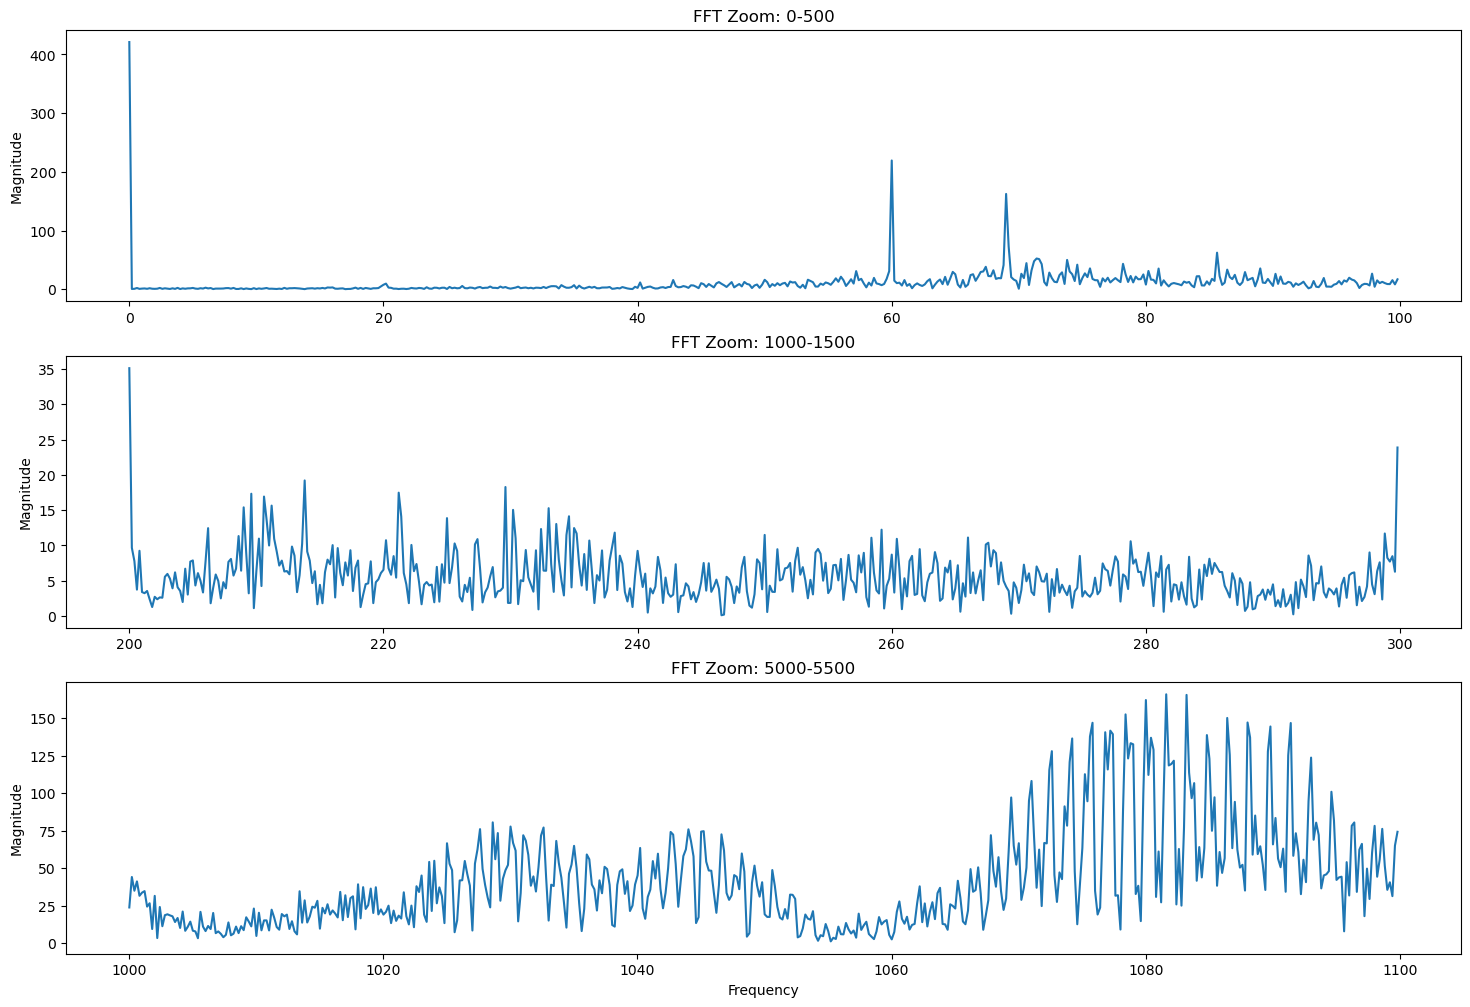

In [55]:
fig, ax = plt.subplots(3,1, figsize = (18,12))

ax[0].plot(left_freq[:500], left_magnitude[:500])
ax[0].set_title("FFT Zoom: 0-500")
ax[0].set_ylabel("Magnitude")

ax[1].plot(left_freq[1000:1500], left_magnitude[1000:1500])
ax[1].set_title("FFT Zoom: 1000-1500")
ax[1].set_ylabel("Magnitude")

ax[2].plot(left_freq[5000:5500], left_magnitude[5000:5500])
ax[2].set_title("FFT Zoom: 5000-5500")
ax[2].set_xlabel("Frequency")
ax[2].set_ylabel("Magnitude")

plt.show()

### Time-Frequency Domain - Spectrogram

As we can see we are loosing information with both of these techniques - either the time dimension or the frequency dimension. To preserve more information we can use **spectrograms**. To calculate spectrograms we use **Short Time Fourier Transform (STFT)**. In STFT we are taking just a small window of signal and doing similar calculation as before. 

The STFT is a modification of the Fourier transform that allows us to analyze non-stationary signals, i.e. signals that change over time. The STFT breaks the signal into small, overlapping frames and applies the Fourier transform to each frame separately, producing a time-frequency representation of the signal.

After calculating STFTs we are projecting them to create spectrograms. In spectrograms we have time on the x axis, frequency on the y axis and decibels are displayed using colors.

In [56]:
len(y)

110250

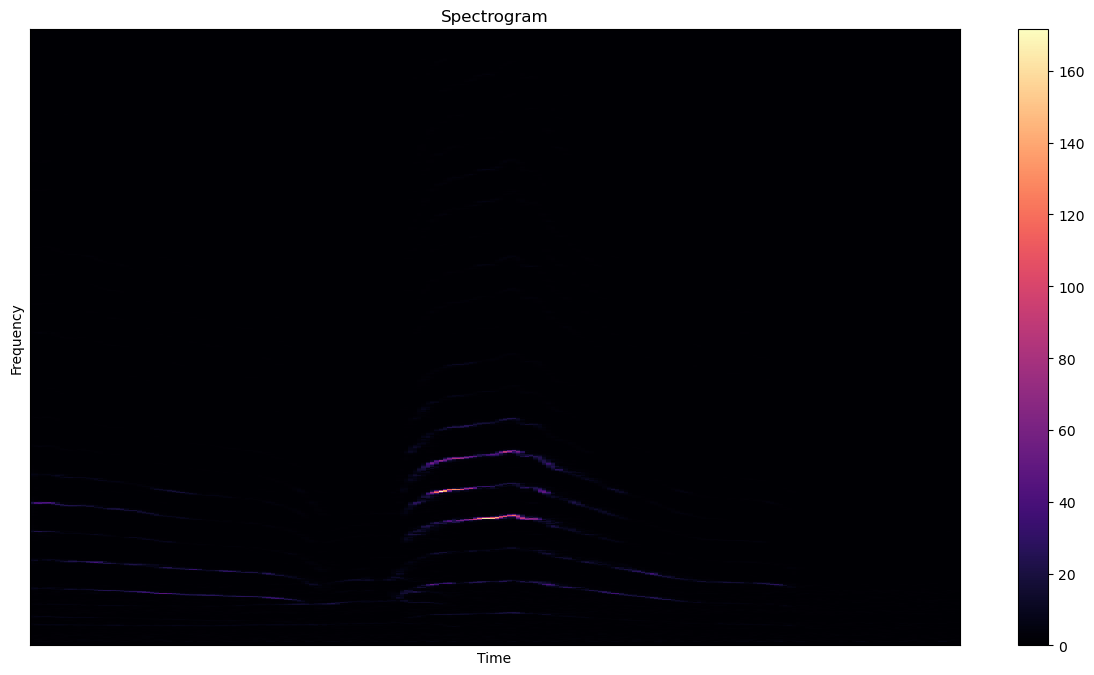

In [57]:
n_fft = 2048 # samples per frame - default value
hop_length = 512 # samples between frame - default value

stft = librosa.core.stft(y, hop_length = hop_length, n_fft = n_fft)
spectrogram = np.abs(stft)  

plt.figure(figsize = (15,8))
lr.display.specshow(spectrogram, sr = 22050, hop_length = hop_length)
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

The number of time frames is computed as (110250 - 2048) / 512 + 1 = 216, since we can fit 216 frames of length 2048 with a hop length of 512 within the length of the input signal.
In the case of the spectrogram calculation using librosa in the previous example, we used an FFT length of 2048 samples. Therefore, the number of unique frequency components is (2048/2)+1 = 1025. This corresponds to the number of frequency bins in the resulting spectrogram.

As you can see most of the spectogram colored with black (low decibels). The reason of that is we do not perceive sound in a linear way as we plotted but in a logarithmic way. So let's code it again with log. One more reason that all action is on the bottom of the spectogram.

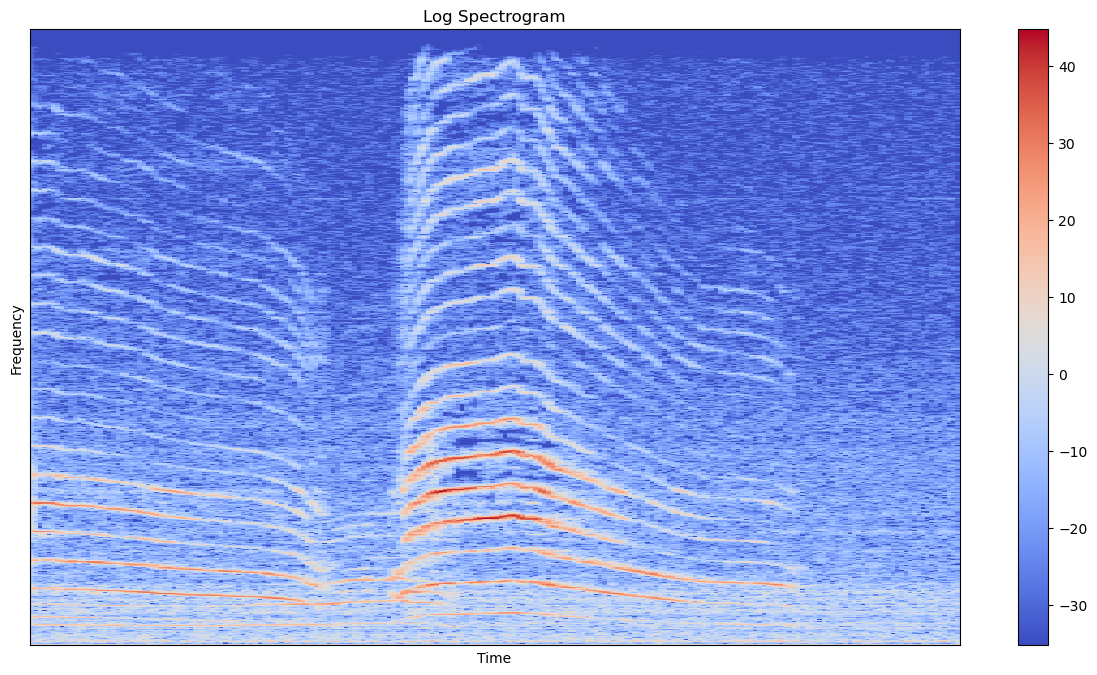

In [58]:
log_spectrogram = librosa.amplitude_to_db(spectrogram) # applying logarithm

plt.figure(figsize = (15,8))
librosa.display.specshow(log_spectrogram, sr = 22050, hop_length = hop_length)
plt.title("Log Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

Example spectograms for some musical instruments:

In [59]:
Image(url="./input/spectogram_instruments.png", width=600)

### MFCC (Mel Frequency Cepstral Coefficients)

**Mel Frequency Cepstral Coefficients** (MFCC) takes into account human perception for sensitivity at appropriate frequencies by converting the conventional frequency to Mel Scale, and are thus suitable for speech recognition tasks quite well (as they are suitable for understanding humans and the frequency at which humans speak).

MFCC also can be used to identify different instruments. It has time on the x axis, MFCC coefficents on the x axis. Most of the time for machine learning taske we set the number of MFCCs to 13.

In [60]:
Image(url="./input/mfcc.png", width=600)

Here's how MFCC works:

- First, the sound signal is divided into small frames, typically around 20-30 milliseconds in length. Each frame is assumed to be stationary, meaning that its spectral content doesn't change significantly over time.
- Next, a window function is applied to each frame to smooth out any abrupt changes at the beginning and end of the frame.
- Then, the Fourier transform is applied to each frame to obtain the frequency spectrum. This gives us a measure of how much energy is present at different frequencies in each frame.
- Next, we apply the Mel filterbank to the frequency spectrum. The Mel scale is a perceptual scale of pitches that is based on the way humans perceive sound. The Mel filterbank is a set of triangular filters that are spaced evenly on the Mel scale, and they are used to group together nearby frequencies that are more perceptually similar.
- After applying the Mel filterbank, we take the logarithm of the filterbank outputs. This compresses the dynamic range of the signal and emphasizes the lower frequencies, which are more important for speech and music.
- Finally, we apply the discrete cosine transform (DCT) to the log filterbank outputs. This gives us a set of coefficients that represent the spectral characteristics of the sound signal in a compact way. The first few coefficients tend to capture the overall spectral envelope of the sound signal, while the later coefficients capture more detailed spectral features.

Overall, the MFCC representation provides a powerful and compact way to represent the spectral characteristics of a sound signal, which can be used for tasks such as speech recognition, music genre classification, and sound event detection.It extracts features from the frequency spectrum of a sound signal, which are then used to represent the signal in a lower-dimensional space for further analysis or classification. For that task convolutions are often used.

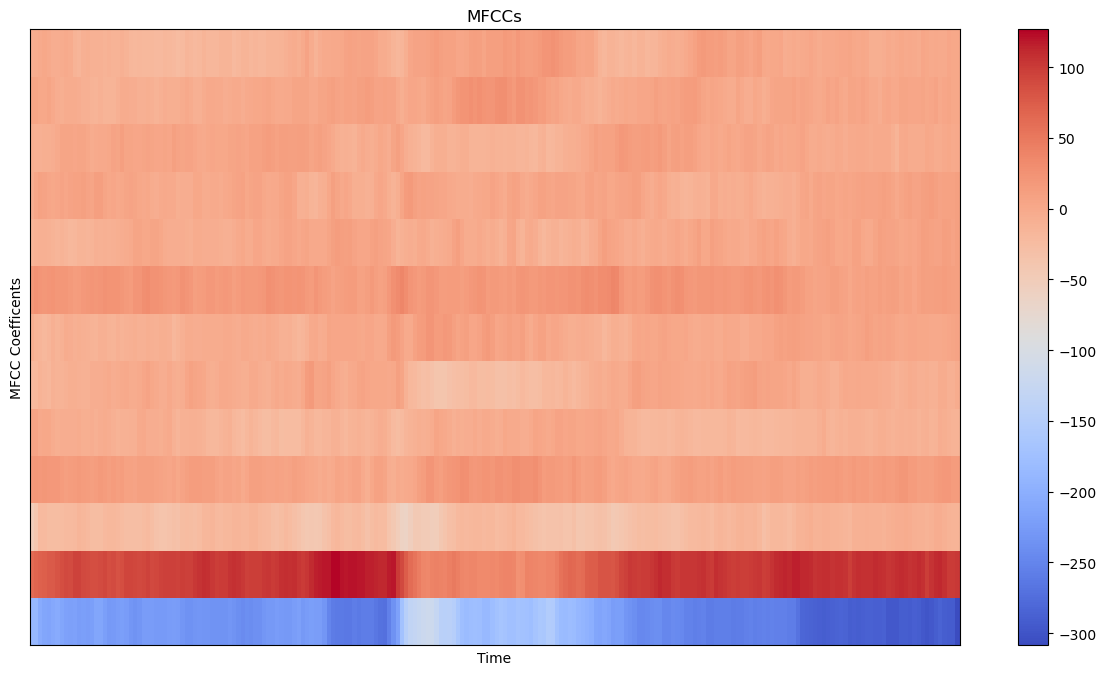

In [61]:
MFCCs = librosa.feature.mfcc(y= y, n_fft = n_fft, hop_length = hop_length, n_mfcc = 13)

plt.figure(figsize = (15,8))
librosa.display.specshow(MFCCs, sr = 22050, hop_length = hop_length)
plt.title("MFCCs")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficents")
plt.colorbar()
plt.show()

### Operations with audio signals

We can do various operations on the audio data. Let us import two audio files.

In [62]:
sample_org2, sr2 = lr.load('./input/2_zvuk.wav', offset=False)
sample_org1, sr1 = lr.load('./input/cat.wav',offset=False)

sr1,sr2

(22050, 22050)

In [63]:
display(Audio(data = sample_org2, rate = sr1))
display(Audio(data = sample_org1, rate = sr1))

#### Sum of two signals (mixing signals)

In [64]:
merged_audio = sample_org1 + sample_org2
Audio(data = merged_audio, rate = sr1)

*Question*: What do we get when we subtract two sound signals?

#### Concatenation (extending signal length)

In [65]:
merged_audio=np.append(sample_org1, sample_org2)
display(Audio(data = merged_audio, rate = sr1)) 

#### Extraction (trimming of signal)

In [66]:
time_2_seconds=2*sr1
first_2_seconds = merged_audio[:time_2_seconds]
last_2_seconds = merged_audio[-time_2_seconds:]
display(Audio(data = first_2_seconds, rate = sr1)) 
display(Audio(data = last_2_seconds, rate = sr1)) 

#### Lowering sound

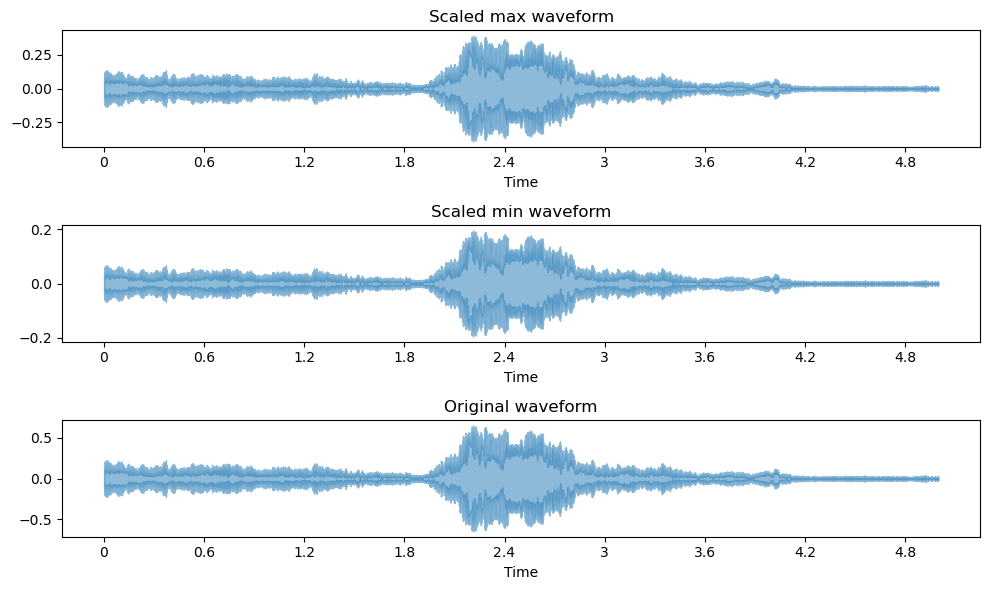

In [67]:
y, sr = librosa.load('./input/cat.wav',offset=False)

y_scaled_max = y * 0.6
y_scaled_min = y * 0.3

# Plot the original and scaled waveforms
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
librosa.display.waveshow(y_scaled_max, sr=sr, alpha=0.5)
plt.title('Scaled max waveform')
plt.subplot(3, 1, 2)
librosa.display.waveshow(y_scaled_min, sr=sr, alpha=0.5)
plt.title('Scaled min waveform')
plt.subplot(3, 1, 3)
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.title('Original waveform')
plt.tight_layout()
plt.show()

display(Audio(data = y_scaled_max, rate = sr, normalize=False))
display(Audio(data = y_scaled_min, rate = sr, normalize=False)) 
display(Audio(data = y, rate = sr))

#### Modifying the audio (rate > 1 - signal is speed up, rate < 1 - signal is slowed down)

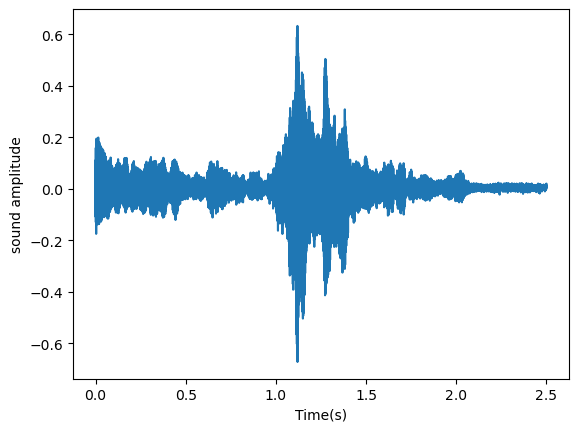

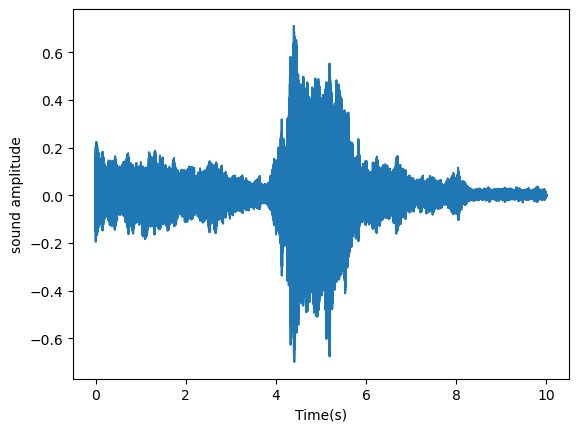

In [68]:
y, sr = lr.load('./input/cat.wav')

y_fast = lr.effects.time_stretch(y=y, rate=2.0)
time = np.arange(0,len(y_fast))/sr
fig, ax = plt.subplots()
ax.plot(time,y_fast)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()#compress to be twice as fast

y_slow = lr.effects.time_stretch(y, rate= 0.5)
time = np.arange(0,len(y_slow))/sr
fig, ax = plt.subplots()
ax.plot(time,y_slow)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()#half the original speed

In [69]:
display(Audio(data = y_slow, rate = sr)) 
display(Audio(data = y_fast, rate = sr)) 
display(Audio(data = y, rate = sr)) 

#### Writing audio

In [70]:
import soundfile as sf

sf.write('./input/output.wav', y_slow, sr)

### DIY tasks

1. Import audio file `kokos.wav`. What is the length of this file?
2. Inspect imported sound (use `Audio` and `plt.plot`).
3. Reverse the imported sound wave and check the result.
4. Mix previously used `cat.wav` with `kokos.wav`.
5. Double the original file in two ways and save the results:
    - Use librosa `time_stretch` function.
    - Concatenate the original sound wave with reversed sound wave from task 3.  
6. Analyze the representation of `kokos.wav` in sprectral domain. Compare this with the spectral representation of mix from the task 4.
7. Visualize spectogram of `kokos.wav` and compare it to spectogram of first half of `kokos.wav`.
8. Load nutcracker from librosa examples and separate the track using `librosa.effects.hpss` method. Why is it possible to separate it so easily?

### Links/used resources

- https://www.kaggle.com/code/mrhippo/introduction-to-sound-analysis
- https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/
- https://opensource.com/article/19/9/audio-processing-machine-learning-python
- https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd
- https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5
- https://www.youtube.com/playlist?list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0
- https://brilliant.org/wiki/discrete-fourier-transform/
- https://towardsdatascience.com/audio-deep-learning-made-simple-part-1-state-of-the-art-techniques-da1d3dff2504